In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
## Generate some fake data
# cell_resps variable should be a [#_cells,#_directions] array of the average response at each direction.

## two cells, one with sharp tuning and one with broad tuning (plus some noise)
## single peaked data
cell_resps=[[0,10,0,0,0,0,0,0]+np.random.normal(0,0.5,8),
            [1,1,1,1,1,1,1,1]+np.random.normal(0,0.5,8)]
# # multi-peaked data
# cell_resps=[[0,10,0,0,0,10,0,0]+np.random.normal(0,1,8),
#             [1,1,1,1,1,1,1,1]+np.random.normal(0,1,8)]

#
# cell_resps=[[0,10,0,0]+np.random.normal(0,1,4),
#             [1,1,1,1]+np.random.normal(0,1,4)]
cell_resps=np.array(cell_resps)
print(cell_resps.shape)

#direction in radians
#dirs=[0, 45, 90, 135, 180, 225, 270, 315,360] 
#dirs_r=[math.radians(dr) for dr in dirs]
 dirs=[0, 45, 90, 135,0] #last value has to be same as first value, for polar plot
 dirs_r=[math.radians(dr) for dr in dirs]

## Normalize
normalizeDFF=True #Sometimes its useful to normalize your data so that there are no negative values,
                   #which can produce CVs with negative values or >1. This normalizes data so the minimum response is
                   # zero, and the maximum response is 1.

(2, 8)


## Circular variance

'The circular variance is a single number that combines tuning width and preferred/orthogonal response characteristics. Note that this formula is 1 - [vector magnitude]/[total response]. 

If a cell responds to 1 and only 1 stimulus around the circle, then the circular variance is 0.  If a cell responds to every orientation equally, then the circular variance is 1.' (Van Hooser)

However, cirular variance is often reported as its inverse, 1-CV, so that higher values are "more selective" and lower values are "less selective"

Circular variance for orientation selectivity is calculated from 0° to 180°, with a maximal 1-CV=1. If you have direction selective data (0° to 360°) with two peaks at symetrical orientations, the maximal 1-CV=0.5, which is why you may want to use:

Directional circular variance is a related measure that calculates the variance when from 0° to 360°, with a maximal 1-dCV=1. 

For more details, see: https://wiki.vhlab.org/data-analysis-after-data-extraction/measures-of-orientation-and-direction-selectivity

In [3]:
#plot circular variance
cell_CVs=[]
cell_dirCVs=[]
for icell,cell_resp in enumerate(cell_resps):
    if normalizeDFF:
        cell_resp=(cell_resp-np.min(cell_resp))/(np.max(cell_resp)-np.min(cell_resp))
    a=[]
    for idir,resp in enumerate(cell_resp):
        a.append(resp*np.exp(2*1j*np.deg2rad(dirs[idir])))
        
    cell_CVs.append(1-np.linalg.norm(np.sum(a)/np.sum(cell_resp)))

    a=[]
    for idir,resp in enumerate(cell_resp):
        a.append(resp*np.exp(1j*np.deg2rad(dirs[idir])))
        
    cell_dirCVs.append(1-np.linalg.norm(np.sum(a)/np.sum(cell_resp)))

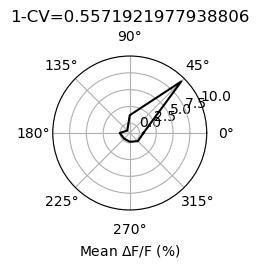

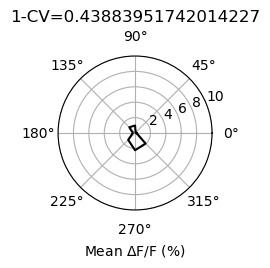

In [4]:
#Plot average dF/F responses Polar plot
for icell,cell_resp in enumerate(cell_resps):
    resp=np.zeros(9)
    resp[0:8]=cell_resp
    #add first value to end to complete the circle
    resp[8]=cell_resp[0]
    ## For only 4 directions
    # resp=np.zeros(5)
    # resp[0:4]=cell_resp
    # #add first value to end to complete the circle
    # resp[4]=cell_resp[0]
    
    #plot
    fig,ax=plt.subplots(1,1,figsize=(2,2),subplot_kw={'projection': 'polar'})
    ax.plot(dirs_r,resp,color='k')
    ax.set_xlabel(r'Mean $\Delta$F/F (%)')
    ax.set_title('1-CV={}'.format(1-cell_CVs[icell]))
    ax.set_rmax(10) 
